In [1]:
from importlib import reload

In [2]:
import m_vEoS #import module to be able to reload
reload(m_vEoS) #reloads module if we have to fix something inside it
from m_vEoS import c_vEoS #imports/reimports vEoS class from the loaded/reloaded module

R=8.3144598
R=8.3144598


In [3]:
import numpy as np

#setup a  test system:

Ncomp=3

Tc_water = 647.1    #K
Pc_water = 220.55e5  #Pa
w_water = 0.345

Tc = np.array([300,270,Tc_water]) #K
Pc = np.array([10e5, 50e5, Pc_water]) #Pa
w = np.array([0,0.1,w_water]) #dimensionless
kij = np.array([[0,0,0],
                [0,0,0],
                [0,0,0]]) #dimensionless

T=298 #K
P=10e5 #Pa
z = np.array([.1,.2,.7])  #normalized



In [4]:
eos = c_vEoS(Ncomp,Tc,Pc,w,kij) #instantiates an eos object from the imported/reimported vEoS class

1.89792030681e-05
(0.86971793792882379, array([ 2.58179368,  0.3744927 ,  0.86971794]))
142179.963548


/home/segtovichisv/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


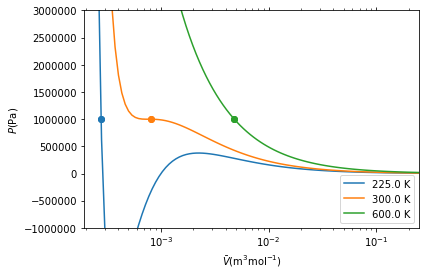

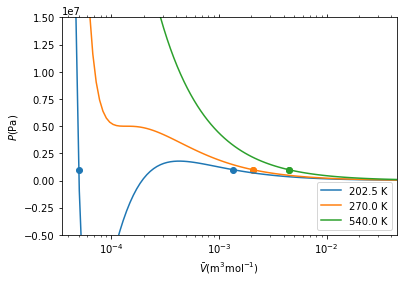

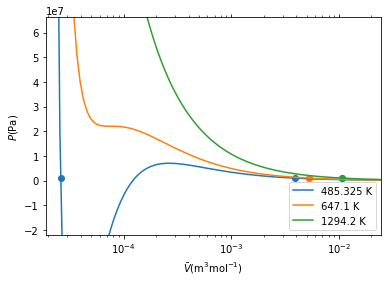

In [5]:
#minor EoS tests

from scipy.constants import R
import matplotlib.pyplot as plt #this line imports the module pyplot from the package matplotlib

Ttest=380.625
Ptest=.1e4
Vtest=22e-3
# xtest=np.array([.1,.2,.7])
xtest=np.array([.0,.0,1.])

print(eos.f_bmix(x=xtest))
print(eos.f_Aalphamix(T=Ttest,x=xtest))

print(eos.Pressure(T=Ttest,V=Vtest,x=xtest))

fig = plt.figure(1) #activate a figure

for i in range(Ncomp):

    for T in np.array([.75,1.,2.])*Tc[i]:
    #--------numpy.linspace <-- remember in course 1 we used the function "range" from python. that function works only for integers.
    #here we want to make a range of real values. for that, we have to use the functions numpy.arange or numpy.linspace
    #numpy.linspace works in the following way: we provide a initial value, and end value and the number of values, and it returns us a list with the desired number of values equally spaced in the desired interval

        #array of values for volume
        Vmi = np.logspace(np.log10(eos.bc[i]*1.01),2+np.log10(R*Tc[i]/Pc[i]),100)
        #here we use numpy.log the logarithm function and the linspace function to create a list that is equally spaced in the logarithm scale
        #and the numpy.exp,  the numpy exponencial to recover the values displayed in the original scale
        #this transformation to logarithm scale is convenient, given that the values obtained from the equation of state encompass several orders of magnitude.

        xtest=np.zeros(Ncomp)
        xtest[i]=1.
        
        plt.semilogx(Vmi,eos.Pressure(T,Vmi,xtest),label=str(T)+' K') #create a logarithm vs logarithm scale plot of pressure vs volume, using the function pressure in each value of the volume list
        plt.ylabel(r'$P (\mathrm{Pa})$') #create labels to be displayed in y axis of the plot
        plt.xlabel(r'$\bar{V} (\mathrm{m^{3}mol^{-1}})$') #use matplotlib's  mathtext to create special symbols in the x label

        plt.ylim(-Pc[i],Pc[i]*3)#define max and min limits of the y axis only to the positive pressure range. remember that this plot is in logarithm scale and it does not accept negative values.
        plt.xlim(eos.bc[i],(R*Tc[i]/Pc[i])*100) #define max and min limits of the x axis

        plt.tick_params( # choose some formatting to the ticks
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='on',      # ticks along the bottom edge are off
        top='on',         # ticks along the top edge are off
        labelbottom='on') # labels along the bottom edge are off

        Ptest=1000000
        Ttest=T
        Vtest=eos.Volume(T=Ttest,P=Ptest,x=xtest)
        
        plt.scatter(Vtest,[Ptest,Ptest])
        
        
    plt.legend()    

    plt.show() #finally
    




In [6]:
Ttest=273
Ptest=1e5
xtest=np.array([0.,0.,1.])
Vtest=eos.Volume(T=Ttest,P=Ptest,x=xtest)
print(Vtest)
print(eos.fugacity_coeff(T=Ttest,V=Vtest[0],x=xtest))
print(eos.fugacity_coeff(T=Ttest,V=Vtest[1],x=xtest))

print(eos.f_H_res(T=Ttest,V=Vtest[0],x=xtest))

print(eos.f_S_res(T=Ttest,V=Vtest[0],x=xtest))



[  2.09079681e-05   2.22583850e-02]
[  2.30568347e+40   1.85899805e+06   4.75931400e-03]
[ 0.96141238  0.99494978  0.98096772]
-46956.2620912
-127.53812463


In [7]:
#pedro
xtest=np.array([0.,0.,1.])
T=373


P = 1.01e5 #Pa
V = 2.199754 #volume molar do liquid
Vs=eos.Volume(T,P,xtest)
print(Vs)
print(2.25075562575e-05,0.0304393142807)
#OK

##
P = 1.01e5 #Pa
Tv = np.array([333,343,353,363,373,383,393])
Vs=eos.Volume(T=Tv[0],P=P,x=xtest)
print(Tv[0],P,Vs[0], Vs[1],xtest)
print(333, 101000.0, 2.25075562575e-05, 0.000225075251015) 
print('HL = ',eos.f_H_res(Tv[0],Vs[0],xtest),"@",Tv[0], P, Vs[0])
print('HV = ',eos.f_H_res(Tv[0],Vs[1],xtest),"@",Tv[0], P, Vs[1])

print("""

HL =  -43021.962576 @ 333 101000.0 2.25075705393e-05
 HV =  259.589246108 @ 333 101000.0 0.0304393142808
""")

[  2.25075705e-05   3.04393143e-02]
2.25075562575e-05 0.0304393142807
333 101000.0 2.17662060294e-05 0.0270915528372 [ 0.  0.  1.]
333 101000.0 2.25075562575e-05 0.000225075251015
HL =  -44094.5975502 @ 333 101000.0 2.17662060294e-05
HV =  -84.2232000553 @ 333 101000.0 0.0270915528372


HL =  -43021.962576 @ 333 101000.0 2.25075705393e-05
 HV =  259.589246108 @ 333 101000.0 0.0304393142808



In [8]:
T=373
P=1e5
V=np.real(eos.Volume(T=T,P=P,x=xtest))[0]
print(V)
H=eos.f_H_res(T=T,V=V,x=xtest)
S=eos.f_S_res(T=T,V=V,x=xtest)
print(H,S)

V=np.real(eos.Volume(T=T,P=P,x=xtest))[1]
print(V)
H=eos.f_H_res(T=T,V=V,x=xtest)
S=eos.f_S_res(T=T,V=V,x=xtest)
print(H,S)

2.25075762133e-05
-42172.7994417 -112.612274029
0.0307463926529
-70.9219763517 -0.118940281504


In [9]:
T=373
print(xtest)
print (T,eos.Pressure(T,0.0224,xtest))

print("""
8.3144598 373 0.0224 1.8979203068053684e-05 0.8795022963719739
373 136818.1390437065
""")

[ 0.  0.  1.]
373 136818.139044

8.3144598 373 0.0224 1.8979203068053684e-05 0.8795022963719739
373 136818.1390437065



In [10]:
xtest=np.array([1.,0.,0.])
Ptest=100000
Ttest=225
print(eos.Volume(T=Ttest,P=Ptest,x=xtest))

print(eos.fugacity_coeff(T=Ttest,P=Ptest,V=Vtest,x=xtest))
print(eos.res_H(T=Ttest,P=Ptest,V=Vtest,x=xtest))
print(eos.res_S(T=Ttest,P=Ptest,V=Vtest,x=xtest))


[ 0.00028624  0.01713069]


TypeError: fugacity_coeff() got an unexpected keyword argument 'P'

In [23]:
Ttest=373
Ptest=1.e5
xtest=np.array([1e-5,1e-5,1])
Vs=eos.Volume(T=Ttest,P=Ptest,x=xtest)
print(eos.fugacity_coeff(T=373,V=Vs[0],x=xtest)[2])
print(eos.fugacity_coeff(T=373,V=Vs[1],x=xtest)[2])

def P_sat(T,iguess_P):  #aqui é dado um T (ok)
    RES=1
    TOL=1e-10
    MAX=1000
    i=0
    P=iguess_P #AQUI VOCÊ CHUTA UM P (ok)
  
    while(RES>TOL and i<MAX): 
    
        [V_L,V_V]=eos.Volume(T=T,P=P,x=xtest) #aqui vc calcula os volumes para esse par (T,P) (ok)
        #print([V_L,_,V_V])
        phi_L=eos.fugacity_coeff(T=T,V=V_L,x=xtest)[2] #aqui vc calcula o Gres pa cada caso
        phi_V=eos.fugacity_coeff(T=T,V=V_V,x=xtest)[2] #aqui vc calcula o Gres pa cada caso
       
        P=P*(phi_L/phi_V) #aqui vc atualiza o P em busca do P que resolve seu problema de calculo de equilibrio de fases
        
        #print('P_it = ',P) #esse print deixa vc acompanhar o andamento do calculo e ver se está convergindo ou divergindo
        RES=abs(phi_L/phi_V-1) #não se esqueça de usar o ABS para gerar um valor em MÓDULO
        i=i+1
        #print("P,V_L,V_V,phi_L,phi_V")
        #print(P,V_L,V_V,phi_L,phi_V,phi_L/phi_V-1.)
    return P

Psat=P_sat(353,1e5) 
print("Psat = ",Psat)
Psat=P_sat(363,1e5) 
print("Psat = ",Psat)
Psat=P_sat(373,1e5) 
print("Psat = ",Psat)
Psat=P_sat(383,1e5) 
print("Psat = ",Psat)
Psat=P_sat(393,1e5) 
print("Psat = ",Psat)

0.947141577651
0.991473278311
Psat =  43610.6286922
Psat =  65354.7420093
Psat =  95488.5510424
Psat =  136323.311351
Psat =  190542.525988
